<a href="https://colab.research.google.com/github/RamanEbrahimi/ComputationalPhysics/blob/main/SelfAvoidingRandomWalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

backtracking, 6 steps
current length 201
backtracking, 4 steps
current length 201
backtracking, 13 steps
current length 243
backtracking, 2 steps
current length 336
backtracking, 4 steps
current length 341
backtracking, 8 steps
current length 408
backtracking, 3 steps
current length 500
backtracking, 2 steps
current length 511
backtracking, 3 steps
current length 515
backtracking, 11 steps
current length 570
backtracking, 18 steps
current length 570
backtracking, 10 steps
current length 621
backtracking, 3 steps
current length 634
backtracking, 1 steps
current length 652
backtracking, 2 steps
current length 671
backtracking, 1 steps
current length 712
backtracking, 2 steps
current length 748
backtracking, 27 steps
current length 758
backtracking, 26 steps
current length 758
backtracking, 23 steps
current length 758
backtracking, 25 steps
current length 758
backtracking, 34 steps
current length 758
backtracking, 5 steps
current length 793
backtracking, 14 steps
current length 799
backtr

CalledProcessError: ignored

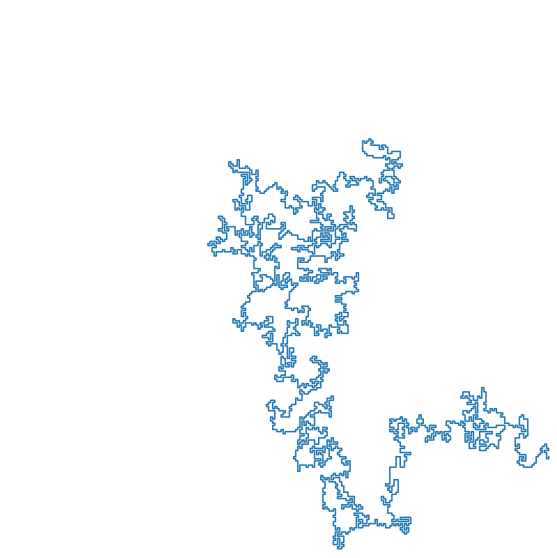

In [ ]:
import random
import math


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

tmax = 10000 #max distance
t = 0

x = [0]
y = [0]


t=0
t_total = 0
coodr = [[x[t],y[t]]]
dist = 0
left = True
up  = True
right = True
down = True
while t < tmax and t_total < tmax:
#    print(len(x) ,  len(y) , len(coodr))
    if [(x[t]-1),y[t]] in coodr:
        left = False
    else:
        left = True
    if [(x[t]+1),y[t]] in coodr:
        right = False
    else:
        right = True
    if [(x[t]),(y[t]+1)] in coodr:
        up = False
    else:
        up = True
    if [(x[t]),(y[t]-1)] in coodr:
        down = False
    else:
        down = True

    all_dir = [left, up, right, down]
#    print(all_dir)
    available_dir = []
    i=0
    for dir in all_dir:
        if dir == True:
            available_dir.append(i)
        i=i+1
#    print(available_dir)
    if len(available_dir) == 3:
        left_inf = []
        up_inf = []
        right_inf = []
        down_inf = []
        for j in range(0,100):
        #for j in range(0, tmax):
            left_inf.append([x[t]-j,y[t]] )
            up_inf.append([x[t],y[t]+j] )
            right_inf.append([x[t]+j,y[t]] )
            down_inf.append([x[t],y[t]-j] )
    #    left_inf_tuple = [tuple(lst) for lst in left_inf]
        left_inf_tuple = set(map(tuple, left_inf))
        up_inf_tuple = set(map(tuple, up_inf))
        right_inf_tuple = set(map(tuple, right_inf))
        down_inf_tuple = set(map(tuple, down_inf))
        coord_tuple = set(map(tuple, coodr))
    #    print("types")
    #    print(type(left_inf_tuple))
    #    print(type((coord_tuple)) )
    #    print((left_inf_tuple).intersection(coord_tuple))
        if  (left_inf_tuple).intersection(coord_tuple) == set():
        #if (any(i in left_inf_tuple for j in coord_tuple)):
        #    print(left_inf_tuple)
        #    print([x[t] , y[t]])
        #    print(coord_tuple)
            #print(left_inf)
        #    print("left is safe")
            safe_t = t
        elif  (up_inf_tuple).intersection(coord_tuple) == set():
        #    print("up is safe")
            safe_t = t
        elif  (right_inf_tuple).intersection(coord_tuple) == set():
        #    print("right is safe")
            safe_t = t
        elif  (down_inf_tuple).intersection(coord_tuple) == set():
        #    print("down is safe")
            safe_t = t

    #    safe_t = t
    #    print(t)
    #    print("tsafe = " + str(safe_t))
    if not available_dir:
        t_diff = t - safe_t
        t = safe_t
        print("backtracking, " + str(t_diff) + " steps")
        coodr = coodr[:-(t_diff)]
        x = x[:-(t_diff)]
        y = y[:(-(t_diff))]
        #print("#"*50)
        print("current length " + str(len(x)))
    else:
        chosen_dir = random.choice(available_dir)
        if chosen_dir == 0:
            x.append(x[t]-1)
            y.append(y[t])
        elif chosen_dir == 1:
            x.append(x[t])
            y.append(y[t]+1)
        elif chosen_dir == 2:
            x.append(x[t]+1)
            y.append(y[t])
        else:
            x.append(x[t])
            y.append(y[t]-1)

        cur_dist = x[t]*x[t]+y[t]*y[t]
        if cur_dist > dist:
            dist = cur_dist
        coodr.append([x[t],y[t]])
        t=t+1
    t_total = t_total + 1


if False:
    coord = random.randint(0,1)

    if coord == 0:
        direction = random.randint(0,1)
        direction = 2*direction -1
        x.append(x[t] + direction)
        y.append(y[t])
        #print("x , " + str(direction))
    else:
        direction = random.randint(0,1)
        direction = 2*direction -1
        y.append(y[t] + direction)
        x.append(x[t])
    cur_dist = x[t]*x[t]+y[t]*y[t]
    if cur_dist > dist:
        dist = cur_dist
    #    print("y , " + str(direction))

#    print(str(x[t]) + " , " +  str(y[t]))
    t=t+1
    coodr.append([x[t],y[t]])

print("max distance was " + str(math.sqrt(dist)))

height = 40
width = 40

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)

xdata, ydata = [], []
ln, = plt.plot([], [])

points = np.c_[x, y]

def init():
#    ax.set_xticks(range(-10,10))
#    ax.set_yticks(range(-10,10))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    #ax.grid()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
#    ax.set_xlim([-1*width, width])
#    ax.set_ylim([-1*height, height])
    ax.set_aspect('equal')
    plt.tick_params(length=0)
    return ln,

def update(points):
    xdata.append(points[0])
    ydata.append(points[1])
    ln.set_data(xdata, ydata)
    ax.set_xticks(range(len(xdata)))
    ax.set_yticks(range(len(ydata)))
    ax.set_xlim([min(xdata+ydata)-1, max(xdata + ydata)+1])
    ax.set_ylim([min(xdata+ydata)-1, max(*xdata, *ydata)+1])
    #ax.grid(b=True, which='both', linewidth=1, c='b', linestyle='-')
    return ln,
print("final t = " + str(t))

# input("waiting for input")
ani = animation.FuncAnimation(fig, update, frames=points,
                             init_func=init, blit=True, repeat=False, interval=1)

ani.save('random_self_avoiding_walk.mp4')
plt.show()